### Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

### Step 1: Importing and Merging Data

In [63]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [64]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

In [65]:
# Importing all datasets
churn_data = pd.read_csv("churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [66]:
customer_data = pd.read_csv("customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [67]:
internet_data = pd.read_csv("internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


#### Combining all data files into one consolidated dataframe

In [68]:
internet_data['MultipleLines'].astype('category').value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [69]:
internet_data.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [70]:
# Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [71]:
# Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

### Step 2: Inspecting the Dataframe

In [72]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [73]:
telecom['PhoneService'].astype("category").value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [74]:
telecom['OnlineBackup'].astype("category").value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [75]:
telecom.OnlineSecurity.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [76]:
telecom.OnlineBackup.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [77]:
# Let's check the dimensions of the dataframe
telecom.shape

(7043, 21)

In [78]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [79]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(1), int64(2), obj

### Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [80]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
telecom[varlist] = telecom[varlist].apply(binary_map)

In [81]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [82]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

In [83]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0


In [84]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [85]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


#### Dropping the repeated variables

In [86]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)



0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [99]:
#The varaible was imported as a string we need to convert it to float
telecom['TotalCharges'] =telecom['TotalCharges'].str.replace(' ','0')
telecom['TotalCharges'] =telecom['TotalCharges'].astype("float")

In [100]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7043 non-null object
tenure                                   7043 non-null int64
PhoneService                             7043 non-null int64
PaperlessBilling                         7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7043 non-null float64
Churn                                    7043 non-null int64
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int64
Dependents                               7043 non-null int64
Contract_One year                        7043 non-null uint8
Contract_Two year                        7043 non-null uint8
PaymentMethod_Credit card (automatic)    7043 non-null uint8
PaymentMethod_Electronic check           7043 non-null uint8
PaymentMethod_Mailed check        

Now you can see that you have all variables as numeric.

#### Checking for Outliers

In [101]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [102]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147,2279.734304
std,24.559481,30.090047,0.368612,2266.794470
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.500000,0.000000,398.550000
50%,29.000000,70.350000,0.000000,1394.550000
75%,55.000000,89.850000,0.000000,3786.600000
90%,69.000000,102.600000,1.000000,5973.690000
95%,72.000000,107.400000,1.000000,6921.025000
99%,72.000000,114.729000,1.000000,8039.256000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

#### Checking for Missing Values and Inputing Them

In [103]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [104]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

In [105]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'SeniorCitizen', 'Partner',
       'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No', 'MultipleLines_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')

In [106]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [107]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

Now we don't have any missing values

### Step 4: Test-Train Split

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'], axis=1)

X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [110]:
# Putting response variable to y
y = telecom['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [111]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(
    X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
877,0.754422,0,0,-0.145568,0.350963,0,0,1,1,0,...,1,0,0,1,0,1,0,1,0,1
5792,-0.710751,1,1,1.051796,-0.377957,1,0,0,0,0,...,1,0,0,1,0,1,1,0,0,1
5334,0.673024,1,1,1.437668,1.329866,0,1,1,0,1,...,0,1,0,1,0,1,0,1,0,1
878,1.120716,1,0,0.006794,0.776103,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
6578,-0.914247,1,0,0.298268,-0.701925,0,0,1,1,0,...,1,0,0,1,0,1,1,0,0,1


In [114]:
X_train

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
877,0.754422,0,0,-0.145568,0.350963,0,0,1,1,0,...,1,0,0,1,0,1,0,1,0,1
5792,-0.710751,1,1,1.051796,-0.377957,1,0,0,0,0,...,1,0,0,1,0,1,1,0,0,1
5334,0.673024,1,1,1.437668,1.329866,0,1,1,0,1,...,0,1,0,1,0,1,0,1,0,1
878,1.120716,1,0,0.006794,0.776103,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
6578,-0.914247,1,0,0.298268,-0.701925,0,0,1,1,0,...,1,0,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.510227,1,1,-1.279999,-0.470781,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3927,-1.199142,1,1,-1.457203,-0.985564,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5955,1.609107,1,0,0.127689,1.136466,0,1,1,0,1,...,0,1,1,0,0,1,0,1,1,0
6936,-1.117744,1,1,0.516874,-0.838102,0,1,1,0,0,...,0,1,1,0,1,0,1,0,1,0


In [115]:
np.mean(y_train)


0.2643002028397566

In [116]:
### Checking the Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.536987079369588

We have almost 27% churn rate

### Step 6: Looking at Correlations

In [117]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

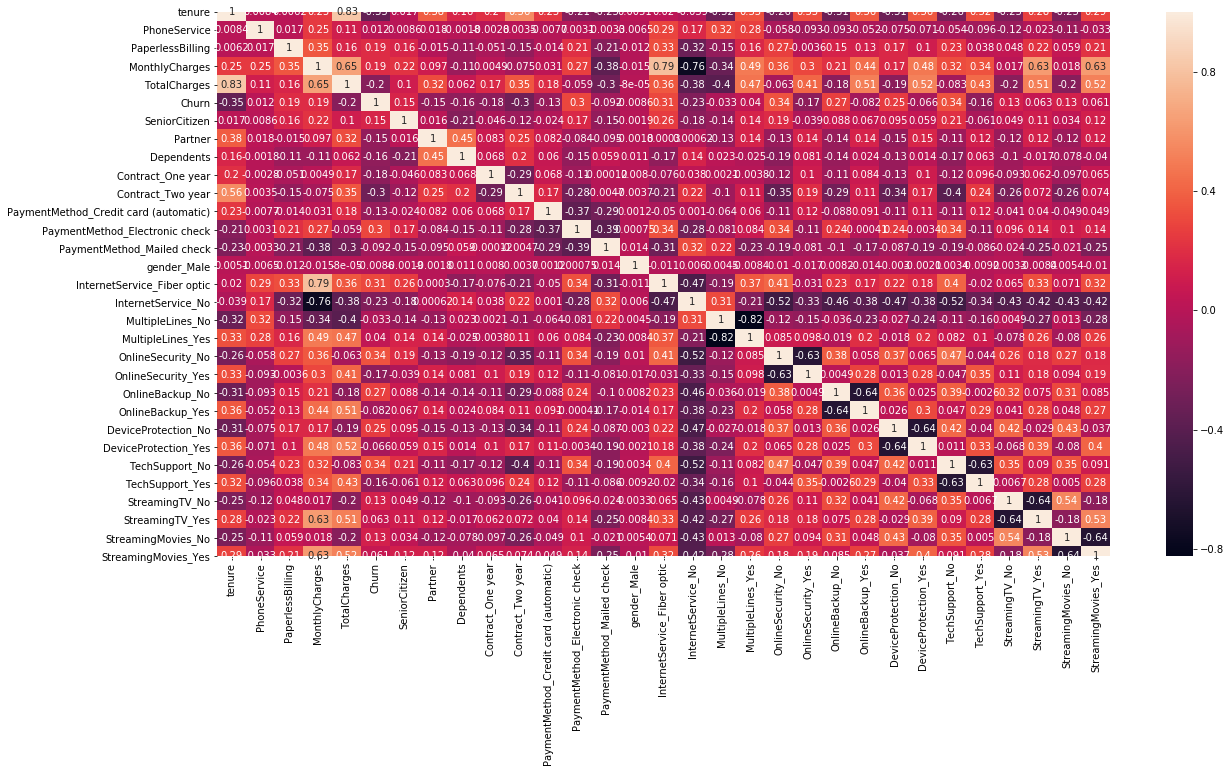

In [118]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)
plt.show()

#### Dropping highly correlated dummy variables

In [119]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

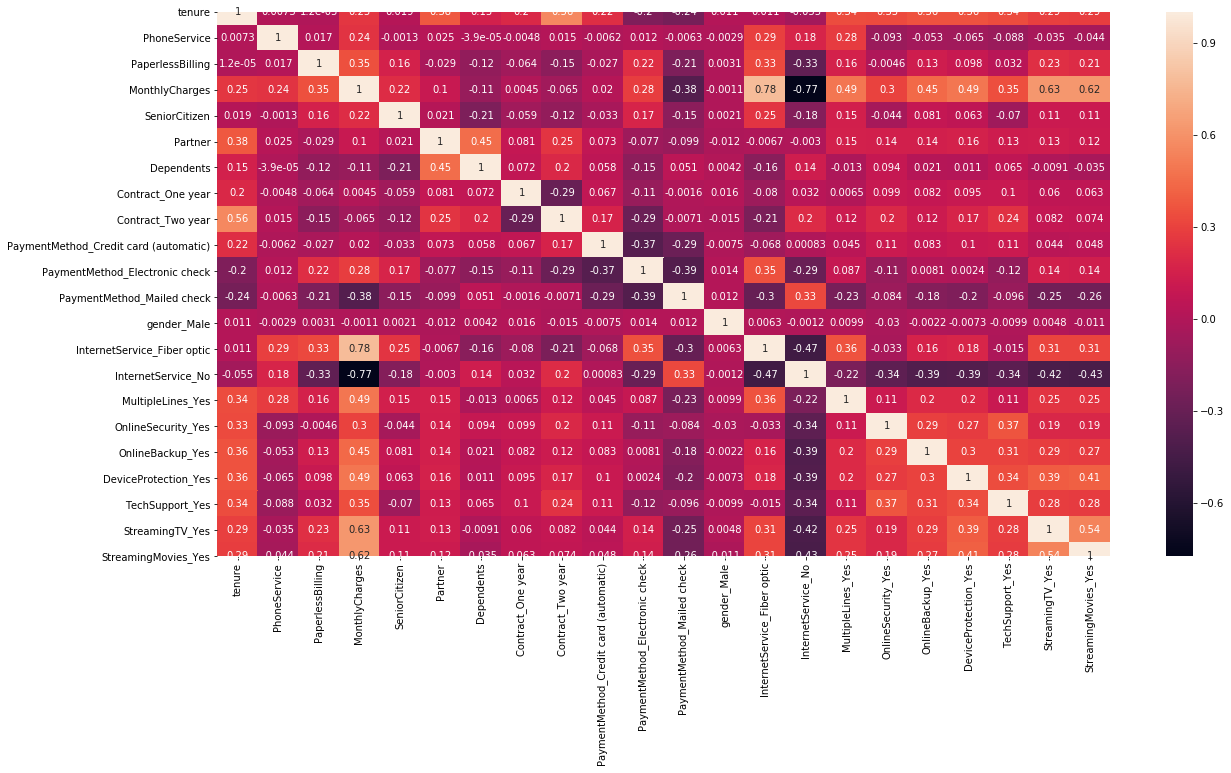

In [46]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [121]:
import statsmodels.api as sm

In [122]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit()

In [123]:
logm1.predict(sm.add_constant(X_train))

ValueError: shapes (4930,24) and (4930,24) not aligned: 24 (dim 1) != 4930 (dim 0)

### Step 8: Feature Selection Using RFE

In [124]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [125]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 877 to 5640
Data columns (total 23 columns):
tenure                                   4930 non-null float64
PhoneService                             4930 non-null int64
PaperlessBilling                         4930 non-null int64
MonthlyCharges                           4930 non-null float64
TotalCharges                             4930 non-null float64
SeniorCitizen                            4930 non-null int64
Partner                                  4930 non-null int64
Dependents                               4930 non-null int64
Contract_One year                        4930 non-null uint8
Contract_Two year                        4930 non-null uint8
PaymentMethod_Credit card (automatic)    4930 non-null uint8
PaymentMethod_Electronic check           4930 non-null uint8
PaymentMethod_Mailed check               4930 non-null uint8
gender_Male                              4930 non-null uint8
InternetService_Fiber optic    

In [126]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
x=logreg.predict(X_test)

In [128]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [56]:
#rfe() rfe._get_param_names()

In [57]:
#( dir(pd.DateOffset))

In [58]:
#type(df2)

In [59]:
#for i in dir(pd):
#    print ( i," I am a ",type ( eval("pd."+i) ) )

In [129]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False, False,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
        True, False,  True,  True, False])

In [130]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 8),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 9),
 ('Dependents', False, 2),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 4),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 5),
 ('gender_Male', False, 7),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', True, 1),
 ('DeviceProtection_Yes', False, 6),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', False, 3)]

In [131]:
col = X_train.columns[rfe.support_]

In [132]:
X_train.columns[~rfe.support_]

Index(['MonthlyCharges', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'gender_Male', 'DeviceProtection_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [133]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False, False,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
        True, False,  True,  True, False])

In [134]:
~rfe.support_

array([False, False, False,  True, False, False,  True,  True, False,
       False,  True, False,  True,  True, False, False, False, False,
       False,  True, False, False,  True])

In [135]:
X_train.columns[~rfe.support_]

Index(['MonthlyCharges', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'gender_Male', 'DeviceProtection_Yes', 'StreamingMovies_Yes'],
      dtype='object')

##### Assessing the model with StatsModels

In [270]:
#type(res)

In [271]:
#type(X_train_sm)

In [272]:
#type(logm2)

In [194]:
type(logm2)

statsmodels.genmod.generalized_linear_model.GLMResultsWrapper

In [183]:
type(res)

statsmodels.genmod.generalized_linear_model.GLMResultsWrapper

In [136]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()


x= logm2.predict(X_train_sm)
x

877     0.040274
5792    0.415665
5334    0.094647
878     0.026862
6578    0.106983
          ...   
79      0.024339
3927    0.215681
5955    0.004440
6936    0.686330
5640    0.631272
Length: 4930, dtype: float64

In [137]:
type(logm2)

statsmodels.genmod.generalized_linear_model.GLMResultsWrapper

In [138]:
type(res)

NameError: name 'res' is not defined

In [139]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4914
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2013.5
Date:                Tue, 17 Mar 2020   Deviance:                       4027.0
Time:                        13:18:59   Pearson chi2:                 5.86e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.0907      0.170     -6.405      0.000      -1.424      -0.757
tenure                            -1.3766      0.174     -7.919      0.000      -1.717      -1.036
PhoneService                      -0.6310      0.158     -3.989      0.000      -0.941      -0.321
PaperlessBilling                   0.3610      0.090      4.020      0.000       0.185       0.537
TotalCharges                       0.6560      0.182      3.604      0.000       0.299       1.013
SeniorCitizen                      0.3323      0.100      3.307      0.001       0.135       0.529
Contract_One year                 -0.6847      0.128     -5.335      0.000      -0.936      -0.433
Contract_Two year                 -1.3542      0.206     -6.564      0.000      -1.759      -0.950
PaymentMethod_Electronic check     0.3638      0.083      4.365      0.000       0.200       0.527
InternetService_Fiber optic        0.7711      0.119      6.495      0.000       0.538       1.004
InternetService_No                -0.9344      0.164     -5.714      0.000      -1.255      -0.614
MultipleLines_Yes                  0.3001      0.096      3.130      0.002       0.112       0.488
OnlineSecurity_Yes                -0.3070      0.102     -3.018      0.003      -0.506      -0.108
OnlineBackup_Yes                  -0.2801      0.093     -3.015      0.003      -0.462      -0.098
TechSupport_Yes                   -0.5067      0.104     -4.877      0.000      -0.710      -0.303
StreamingTV_Yes                    0.2265      0.095      2.386      0.017       0.040       0.412
==================================================================================================
"""

In [140]:
# Getting the predicted values on the train set
print (type(res))
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

<class 'statsmodels.genmod.generalized_linear_model.GLMResultsWrapper'>


877     0.040274
5792    0.415665
5334    0.094647
878     0.026862
6578    0.106983
3090    0.495655
3043    0.737799
5028    0.042510
4463    0.710087
2822    0.063494
dtype: float64

In [141]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.04027374, 0.41566503, 0.09464658, 0.02686241, 0.1069831 ,
       0.49565538, 0.73779932, 0.04250995, 0.71008669, 0.0634939 ])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [142]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.040274,877
1,1,0.415665,5792
2,1,0.094647,5334
3,0,0.026862,878
4,0,0.106983,6578


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [143]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.040274,877,0
1,1,0.415665,5792,0
2,1,0.094647,5334,0
3,0,0.026862,878,0
4,0,0.106983,6578,0


In [211]:
from sklearn import metrics

In [146]:
# Confusion matrix 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3255  372]
 [ 550  753]]


In [213]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [147]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8129817444219067


#### Checking VIFs

In [148]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [149]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,PhoneService,9.14
3,TotalCharges,7.62
0,tenure,6.47
8,InternetService_Fiber optic,4.07
9,InternetService_No,3.32
6,Contract_Two year,3.24
2,PaperlessBilling,2.75
10,MultipleLines_Yes,2.52
14,StreamingTV_Yes,2.43
12,OnlineBackup_Yes,2.08


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.

In [150]:
col = col.drop('PhoneService', 1)
col

Index(['tenure', 'PaperlessBilling', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'TechSupport_Yes', 'StreamingTV_Yes'],
      dtype='object')

In [151]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4915
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2021.4
Date:                Tue, 17 Mar 2020   Deviance:                       4042.8
Time:                        13:20:27   Pearson chi2:                 5.61e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.5099      0.135    -11.146      0.000      -1.775      -1.244
tenure                            -1.2417      0.170     -7.288      0.000      -1.576      -0.908
PaperlessBilling                   0.3600      0.089      4.023      0.000       0.185       0.535
TotalCharges                       0.5282      0.179      2.945      0.003       0.177       0.880
SeniorCitizen                      0.3573      0.100      3.565      0.000       0.161       0.554
Contract_One year                 -0.6989      0.128     -5.456      0.000      -0.950      -0.448
Contract_Two year                 -1.3560      0.206     -6.581      0.000      -1.760      -0.952
PaymentMethod_Electronic check     0.3739      0.083      4.497      0.000       0.211       0.537
InternetService_Fiber optic        0.6125      0.110      5.554      0.000       0.396       0.829
InternetService_No                -1.1313      0.155     -7.316      0.000      -1.434      -0.828
MultipleLines_Yes                  0.2371      0.094      2.530      0.011       0.053       0.421
OnlineSecurity_Yes                -0.3206      0.101     -3.159      0.002      -0.520      -0.122
OnlineBackup_Yes                  -0.2663      0.093     -2.873      0.004      -0.448      -0.085
TechSupport_Yes                   -0.5183      0.104     -4.999      0.000      -0.722      -0.315
StreamingTV_Yes                    0.2643      0.094      2.799      0.005       0.079       0.449
==================================================================================================
"""

In [152]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [153]:
y_train_pred[:10]

array([0.02833813, 0.41674847, 0.09031836, 0.03172591, 0.11444089,
       0.54597558, 0.64716806, 0.04261177, 0.71305632, 0.07136586])

In [154]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [155]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.028338,877,0
1,1,0.416748,5792,0
2,1,0.090318,5334,0
3,0,0.031726,878,0
4,0,0.114441,6578,0


In [156]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8121703853955375


So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [157]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,7.53
0,tenure,6.36
7,InternetService_Fiber optic,3.15
5,Contract_Two year,3.09
1,PaperlessBilling,2.62
13,StreamingTV_Yes,2.41
8,InternetService_No,2.31
9,MultipleLines_Yes,2.28
11,OnlineBackup_Yes,2.02
12,TechSupport_Yes,1.98


In [158]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('TotalCharges')
col

Index(['tenure', 'PaperlessBilling', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes'],
      dtype='object')

In [159]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4916
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.9
Date:                Tue, 17 Mar 2020   Deviance:                       4051.9
Time:                        13:20:35   Pearson chi2:                 5.12e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.6007      0.131    -12.189      0.000      -1.858      -1.343
tenure                            -0.7883      0.066    -11.953      0.000      -0.918      -0.659
PaperlessBilling                   0.3558      0.089      3.982      0.000       0.181       0.531
SeniorCitizen                      0.3595      0.101      3.574      0.000       0.162       0.557
Contract_One year                 -0.6885      0.127     -5.409      0.000      -0.938      -0.439
Contract_Two year                 -1.3302      0.204     -6.510      0.000      -1.731      -0.930
PaymentMethod_Electronic check     0.3670      0.083      4.406      0.000       0.204       0.530
InternetService_Fiber optic        0.7660      0.097      7.892      0.000       0.576       0.956
InternetService_No                -1.1347      0.154     -7.359      0.000      -1.437      -0.832
MultipleLines_Yes                  0.2858      0.092      3.108      0.002       0.106       0.466
OnlineSecurity_Yes                -0.2838      0.101     -2.813      0.005      -0.481      -0.086
OnlineBackup_Yes                  -0.2225      0.092     -2.430      0.015      -0.402      -0.043
TechSupport_Yes                   -0.4737      0.103     -4.612      0.000      -0.675      -0.272
StreamingTV_Yes                    0.3479      0.090      3.861      0.000       0.171       0.524
==================================================================================================
"""

In [160]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [161]:
y_train_pred[:10]

array([0.03579577, 0.42151796, 0.08301092, 0.03635758, 0.11506021,
       0.52809194, 0.61276925, 0.03413482, 0.71045632, 0.07117791])

In [162]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [163]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.035796,877,0
1,1,0.421518,5792,1
2,1,0.083011,5334,0
3,0,0.036358,878,0
4,0,0.115060,6578,0


In [164]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion1

array([[2805,  822],
       [ 302, 1001]], dtype=int64)

In [165]:
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

AttributeError: 'DataFrame' object has no attribute 'final_predicted'

In [260]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.771434376269809


The accuracy is still practically the same.

##### Let's now check the VIFs again

In [233]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Contract_Two year,2.98
10,OnlineSecurity_No,2.80
1,PaperlessBilling,2.56
0,tenure,2.49
8,InternetService_No,2.49
7,InternetService_Fiber optic,2.40
9,MultipleLines_No,2.36
12,StreamingTV_No,1.90
11,TechSupport_Yes,1.86
3,Contract_One year,1.81


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [234]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3279,  356],
       [ 598,  689]], dtype=int64)

In [235]:
# Actual/Predicted     not_churn    churn
        # not_churn        3269      366
        # churn            595       692  

In [236]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8061763510767981

## Metrics beyond simply accuracy

In [237]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [238]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5353535353535354

In [239]:
# Let us calculate specificity
TN / float(TN+FP)

0.9020632737276478

In [240]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.09793672627235213


In [241]:
# positive predictive value 
print (TP / float(TP+FP))

0.6593301435406699


In [242]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8457570286303843


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [243]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [244]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

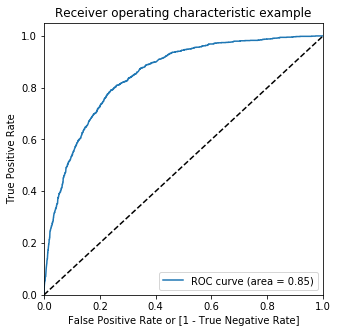

In [248]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [249]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.272756,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.299276,5790,0,1,1,1,0,0,0,0,0,0,0
2,1,0.684862,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.529077,880,1,1,1,1,1,1,1,0,0,0,0
4,1,0.669338,2784,1,1,1,1,1,1,1,1,0,0,0


In [250]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.621292  0.944056  0.507015
0.2   0.2  0.721658  0.851593  0.675653
0.3   0.3  0.771434  0.776224  0.769739
0.4   0.4  0.796424  0.652681  0.847318
0.5   0.5  0.806176  0.535354  0.902063
0.6   0.6  0.801097  0.388500  0.947180
0.7   0.7  0.777936  0.199689  0.982669
0.8   0.8  0.750305  0.053613  0.996974
0.9   0.9  0.738521  0.000000  1.000000


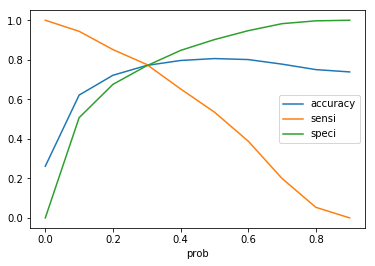

In [251]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [252]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.272756,879,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.299276,5790,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.684862,6498,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.529077,880,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.669338,2784,1,1,1,1,1,1,1,1,0,0,0,1


In [253]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.771434376269809

In [254]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[2798,  837],
       [ 288,  999]], dtype=int64)

In [91]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [92]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7801087801087802

In [93]:
# Let us calculate specificity
TN / float(TN+FP)

0.768363136176066

In [94]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23163686382393398


In [95]:
# Positive predictive value 
print (TP / float(TP+FP))

0.5438786565547129


In [96]:
# Negative predictive value
print (TN / float(TN+ FN))

0.907997399219766


## Precision and Recall

In [97]:
#Looking at the confusion matrix again

In [98]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3269,  366],
       [ 595,  692]], dtype=int64)

##### Precision
TP / TP + FP

In [99]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6540642722117203

##### Recall
TP / TP + FN

In [100]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5376845376845377

Using sklearn utilities for the same

In [101]:
from sklearn.metrics import precision_score, recall_score

In [102]:
?precision_score

In [103]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.6540642722117203

In [104]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.5376845376845377

### Precision and recall tradeoff

In [105]:
from sklearn.metrics import precision_recall_curve

In [106]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       1
 5       0
 6       0
 7       1
 8       0
 9       1
 10      0
 11      1
 12      1
 13      0
 14      0
 15      0
 16      0
 17      0
 18      0
 19      0
 20      0
 21      0
 22      0
 23      0
 24      0
 25      0
 26      0
 27      0
 28      0
 29      0
        ..
 4892    1
 4893    1
 4894    0
 4895    0
 4896    0
 4897    0
 4898    0
 4899    0
 4900    0
 4901    1
 4902    0
 4903    1
 4904    0
 4905    0
 4906    1
 4907    0
 4908    0
 4909    1
 4910    0
 4911    0
 4912    0
 4913    0
 4914    0
 4915    0
 4916    1
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: Churn, Length: 4922, dtype: int64, 0       0
 1       0
 2       1
 3       1
 4       1
 5       0
 6       0
 7       1
 8       0
 9       1
 10      0
 11      1
 12      1
 13      0
 14      0
 15      0
 16      0
 17      0
 18      0
 19      0
 20      0
 21      0
 22      0
 23      0
 24      0
 25      0
 2

In [107]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

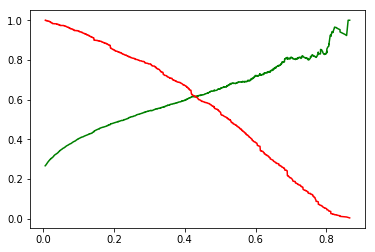

In [108]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [109]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [110]:
X_test = X_test[col]
X_test.head()

,tenure,PaperlessBilling,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,TechSupport_Yes,StreamingTV_Yes
942,-0.347623,1,0,0,0,1,0,1,0,0,0,0,0
3730,0.999203,1,0,0,0,1,0,1,0,1,0,0,1
1761,1.040015,1,0,0,1,1,0,0,1,1,0,0,0
2283,-1.286319,1,0,0,0,0,1,1,0,0,0,0,0
1872,0.346196,0,0,0,1,0,0,0,1,0,0,0,0


In [111]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [112]:
y_test_pred = res.predict(X_test_sm)

In [113]:
y_test_pred[:10]

942     0.397413
3730    0.270295
1761    0.010238
2283    0.612692
1872    0.015869
1970    0.727206
2532    0.302131
1616    0.010315
2485    0.632881
5914    0.126451
dtype: float64

In [114]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [115]:
# Let's see the head
y_pred_1.head()

,0
942,0.397413
3730,0.270295
1761,0.010238
2283,0.612692
1872,0.015869


In [116]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [117]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [118]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [119]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [120]:
y_pred_final.head()

,Churn,CustID,0
0,0,942,0.397413
1,1,3730,0.270295
2,0,1761,0.010238
3,1,2283,0.612692
4,0,1872,0.015869


In [121]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [122]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Churn','Churn_Prob'], axis=1)

In [123]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.397413
1,3730,1,0.270295
2,1761,0,0.010238
3,2283,1,0.612692
4,1872,0,0.015869


In [124]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [125]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,942,0,0.397413,0
1,3730,1,0.270295,0
2,1761,0,0.010238,0
3,2283,1,0.612692,1
4,1872,0,0.015869,0


In [126]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7834123222748816

In [127]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1294,  234],
       [ 223,  359]], dtype=int64)

In [128]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [129]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6168384879725086

In [130]:
# Let us calculate specificity
TN / float(TN+FP)

0.8468586387434555